<a href="https://colab.research.google.com/github/adhin08/Market_Basket_Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  **Data Collection**


Obtained transaction data from publicly available datasets such as the Online Retail dataset from the UCI Machine
Learning Repository

In [ ]:
# Import library pandas
import pandas as pd

# Load the dataset
file_path = '/content/OnlineRetail.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
# To check the dimension of data
df.shape

(541909, 8)

In [ ]:
# To understand about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 2. **Data Preprocessing**

# 2.1 . **Handle Missing Values**

In [ ]:
# Check null values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Drop the missing values
df = df.dropna(axis=0)

# 2.2 . **Remove Duplicates**

In [ ]:
# Check for duplicates
dup = df.duplicated().any()
print("Are there any duplicated values in data?",dup)

Are there any duplicated values in data? True


In [ ]:
# Drop the duplicates
df = df.drop_duplicates()

# 2.3 . **Filter Out Invalid Transactions**

In [ ]:
# Remove negative/zero Quantity
df = df[df['Quantity'] > 0]

# Remove negative/zero Price values
df = df[df['UnitPrice'] > 0]

# 2.4 .**Structure Data for Market Basket Analysis**

In [ ]:
# Group by Invoice no and Description and sum the Quantity
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Converting to binary
basket = basket.map(lambda x: x > 0)


# Dislay
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. **Exploratory Data Analysis (EDA)**

# 3.1 . **Statistics**

In [ ]:
# Import library Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Statistics Summary
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


# 3.2 . **Top Selling Products**

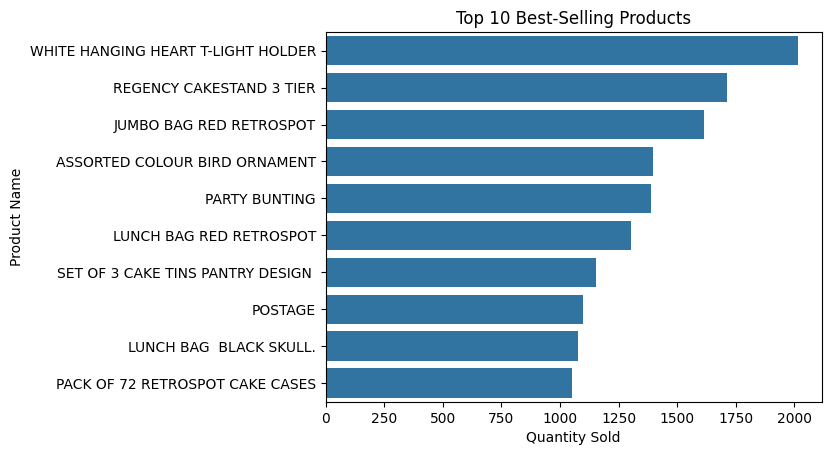

In [ ]:
# Count
top_products = df["Description"].value_counts().head(10)

# Plot
sns.barplot(x=top_products.values, y=top_products.index)
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products")
plt.show()

# 3.3 . **Country-wise Sales**

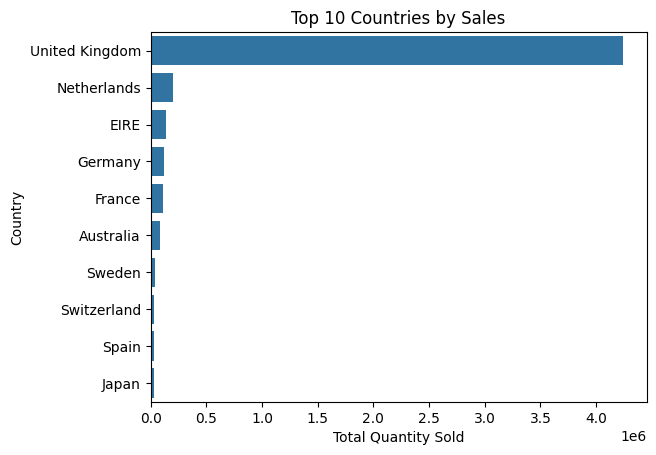

In [ ]:
# Top 10 countries by sales
country_sales = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)

# Plot
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Country")
plt.title("Top 10 Countries by Sales")
plt.show()

# 3.4 . **Customer Purchase Behavior**

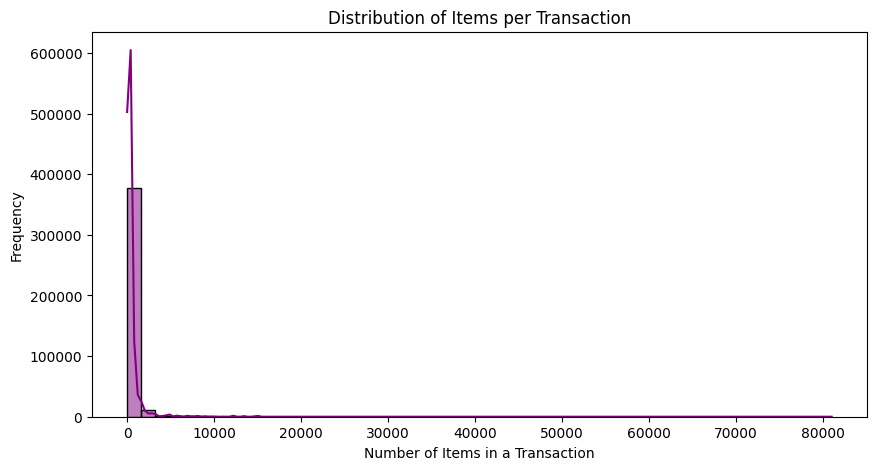

In [ ]:
# Number of items per transaction
df["ItemsPerTransaction"] = df.groupby("InvoiceNo")["Quantity"].transform("sum")

# Plot
plt.figure(figsize=(10,5))
sns.histplot(df["ItemsPerTransaction"], bins=50, kde=True, color="purple")
plt.xlabel("Number of Items in a Transaction")
plt.ylabel("Frequency")
plt.title("Distribution of Items per Transaction")
plt.show()


# 4. **Market Basket Analysis (MBA)**

In [ ]:
# Import Required Libraries
from mlxtend.frequent_patterns import apriori ,association_rules


Apply the Apriori Algorithm

In [ ]:
# Find frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display top 10 frequent itemsets
print(frequent_itemsets.sort_values(by="support", ascending=False).head(10))


      support                              itemsets
587  0.106357  (WHITE HANGING HEART T-LIGHT HOLDER)
414  0.091895            (REGENCY CAKESTAND 3 TIER)
247  0.086337             (JUMBO BAG RED RETROSPOT)
338  0.074412                       (PARTY BUNTING)
38   0.074196       (ASSORTED COLOUR BIRD ORNAMENT)
282  0.069501             (LUNCH BAG RED RETROSPOT)
468  0.061839   (SET OF 3 CAKE TINS PANTRY DESIGN )
374  0.059303                             (POSTAGE)
274  0.056767             (LUNCH BAG  BLACK SKULL.)
323  0.055526     (PACK OF 72 RETROSPOT CAKE CASES)


# 5. **Rule Evaluation & Interpretation**

Generate Association Rules

In [ ]:
# Generate rules based on 'lift'
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top 10 rules
print(rules.sort_values(by="lift", ascending=False).head(10))


                                           antecedents  \
537                           (REGENCY TEA PLATE PINK)   
536                         (REGENCY TEA PLATE GREEN )   
903                    (POPPY'S PLAYHOUSE LIVINGROOM )   
902  (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...   
531                           (REGENCY MILK JUG PINK )   
530                         (REGENCY SUGAR BOWL GREEN)   
905                       (POPPY'S PLAYHOUSE BEDROOM )   
900  (POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...   
540                         (REGENCY TEA PLATE ROSES )   
541                           (REGENCY TEA PLATE PINK)   

                                           consequents  antecedent support  \
537                         (REGENCY TEA PLATE GREEN )            0.012087   
536                           (REGENCY TEA PLATE PINK)            0.014569   
903  (POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...            0.013598   
902                    (POPPY'S PLAYHOUSE LIVINGR

# 6. **Visualization**

**1. Heatmap of Association Rules**

A heatmap helps visualize the strength of relationships using color intensity.

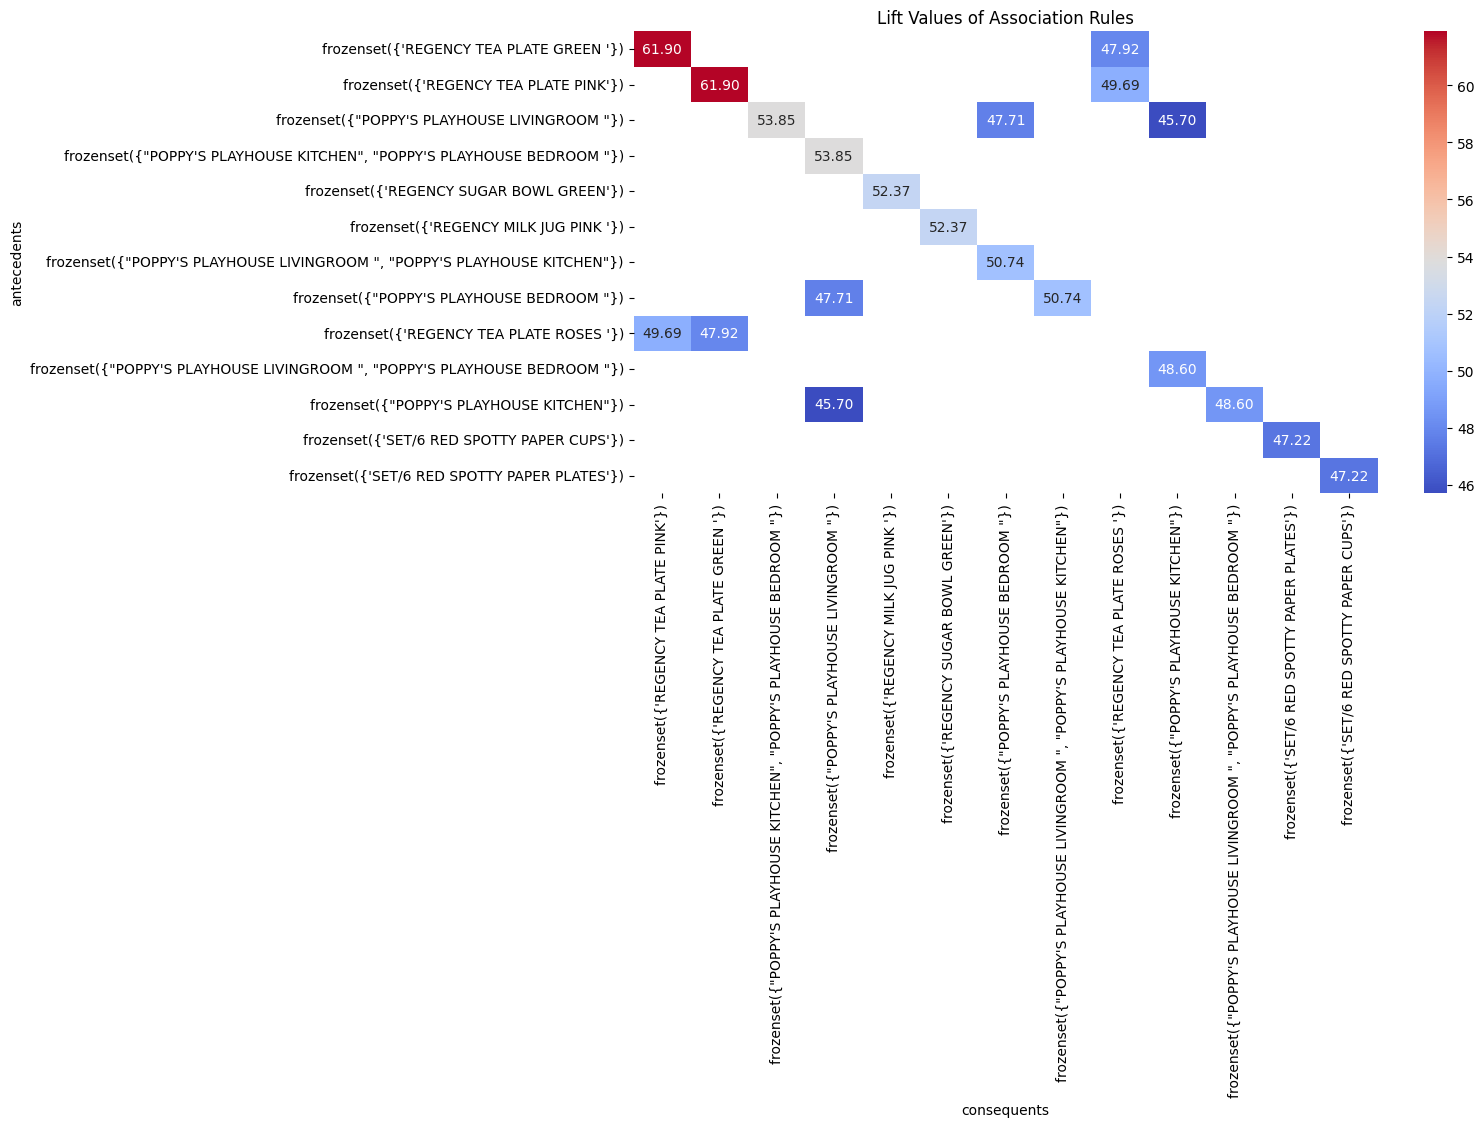

In [ ]:
# Select top 20 association rules based on lift
top_rules = rules.nlargest(20, "lift")

# Create a pivot table for the heatmap
heatmap_data = top_rules.pivot(index="antecedents", columns="consequents", values="lift")

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Lift Values of Association Rules")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**2. Scatter Plot of Lift vs Confidence**

A scatter plot helps identify high-confidence & high-lift rules easily.

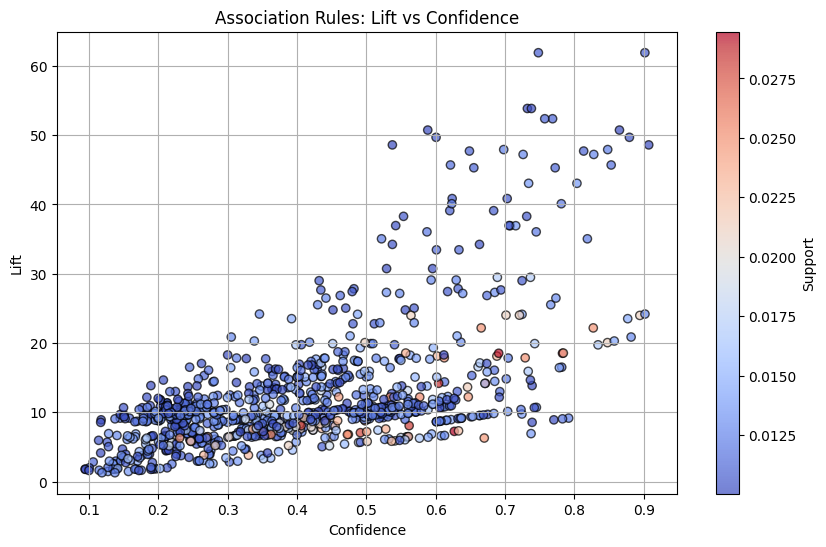

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(rules["confidence"], rules["lift"], alpha=0.7, c=rules["support"], cmap="coolwarm", edgecolors="k")
plt.colorbar(label="Support")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Association Rules: Lift vs Confidence")
plt.grid(True)
plt.show()


**3. Bar Chart of Most Important Rules**

A bar chart can rank the strongest rules based on Lift.

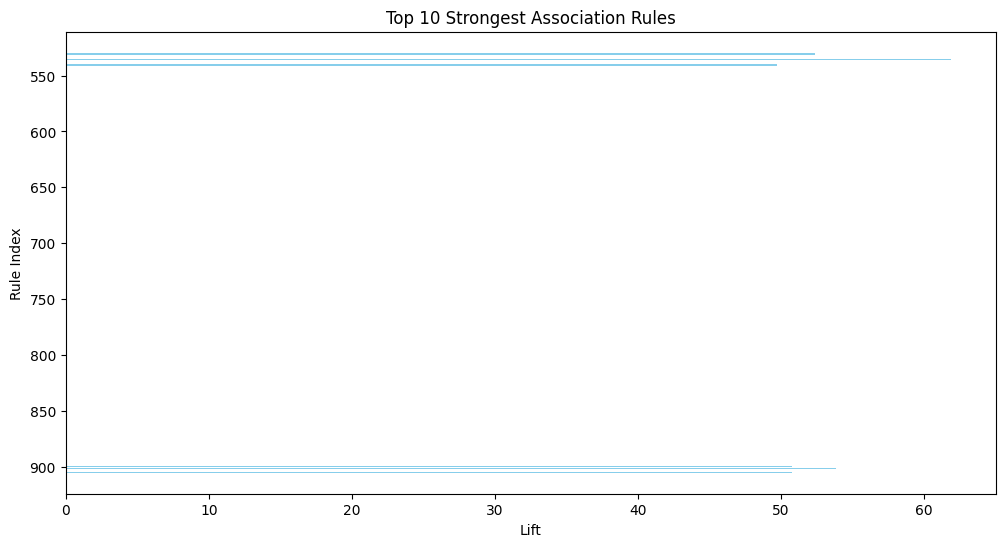

In [ ]:
top_rules = rules.nlargest(10, "lift")

plt.figure(figsize=(12,6))
plt.barh(y=top_rules.index, width=top_rules["lift"], color="skyblue")
plt.xlabel("Lift")
plt.ylabel("Rule Index")
plt.title("Top 10 Strongest Association Rules")
plt.gca().invert_yaxis()
plt.show()


# 7. **Implementation of Recommendations**

# 7.1 . **Filter High-Confidence Rules for Business Use**

In [ ]:
# Filter Strong Rules
strong_rules = rules[(rules["confidence"] > 0.7) & (rules["lift"] > 2)]
print(strong_rules)


                                           antecedents  \
19                    (ALARM CLOCK BAKELIKE CHOCOLATE)   
36                      (PAINTED METAL PEARS ASSORTED)   
45                        (BAKING SET SPACEBOY DESIGN)   
49                                 (TOILET METAL SIGN)   
52                       (PINK HAPPY BIRTHDAY BUNTING)   
..                                                 ...   
907  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   
908  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
911  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
922  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...   
923  (LUNCH BAG PINK POLKADOT, LUNCH BAG  BLACK SKU...   

                                           consequents  antecedent support  \
19                         (ALARM CLOCK BAKELIKE RED )            0.017375   
36                     (ASSORTED COLOUR BIRD ORNAMENT)            0.018994   
45                     (BAKING SET 9 PIECE RETROSPOT )            0.0

**Format Each Rule as a Recommendation for Product Placement Optimization and to create discounted combos.**

In [ ]:
# Loop through strong rules and print recommendations
for i, row in strong_rules.iterrows():
    antecedent = ', '.join(list(row["antecedents"]))  # Convert set to string
    consequent = ', '.join(list(row["consequents"]))  # Convert set to string
    lift = round(row["lift"], 2)  # Round lift value
    confidence = round(row["confidence"] * 100, 2)  # Convert confidence to percentage

    print(f"📌 Rule: If a customer buys **{antecedent}**, they are likely to buy **{consequent}**.")
    print(f"   🔹 Lift = {lift}, Confidence = {confidence}%")
    print(f"   🔹 Suggested Action: Place **{antecedent}** near **{consequent}** in stores or offer a discount on **{consequent}** when **{antecedent}** is purchased.\n")


📌 Rule: If a customer buys **ALARM CLOCK BAKELIKE CHOCOLATE**, they are likely to buy **ALARM CLOCK BAKELIKE RED **.
   🔹 Lift = 14.83, Confidence = 70.19%
   🔹 Suggested Action: Place **ALARM CLOCK BAKELIKE CHOCOLATE** near **ALARM CLOCK BAKELIKE RED ** in stores or offer a discount on **ALARM CLOCK BAKELIKE RED ** when **ALARM CLOCK BAKELIKE CHOCOLATE** is purchased.

📌 Rule: If a customer buys **PAINTED METAL PEARS ASSORTED**, they are likely to buy **ASSORTED COLOUR BIRD ORNAMENT**.
   🔹 Lift = 9.76, Confidence = 72.44%
   🔹 Suggested Action: Place **PAINTED METAL PEARS ASSORTED** near **ASSORTED COLOUR BIRD ORNAMENT** in stores or offer a discount on **ASSORTED COLOUR BIRD ORNAMENT** when **PAINTED METAL PEARS ASSORTED** is purchased.

📌 Rule: If a customer buys **BAKING SET SPACEBOY DESIGN**, they are likely to buy **BAKING SET 9 PIECE RETROSPOT **.
   🔹 Lift = 15.92, Confidence = 73.35%
   🔹 Suggested Action: Place **BAKING SET SPACEBOY DESIGN** near **BAKING SET 9 PIECE RETROSP

# 8. **Performance Evaluation**

# 8.1 . **Importance of Performance Evaluation**

Evaluating the success of Market Basket Analysis (MBA) is crucial to determine whether the implemented recommendations lead to increased sales, better customer engagement, and improved business strategies.

Businesses typically measure performance using key metrics such as:

*   Sales Growth – Increase in revenue after implementing product recommendations.
*   Average Basket Size – More items purchased per transaction.

*   Customer Engagement – Higher click-through rates on recommended products.
*   Conversion Rate – More customers purchasing suggested items.





# 8.2 . **Simulation-Based Evaluation Approach**

In [ ]:
# Define a simulation date (assuming implementation happened on June 1, 2011)
split_date = "2011-06-01"

# Transactions before the simulated implementation
df_before = df[df["InvoiceDate"] < split_date]

# Transactions after the simulated implementation
df_after = df[df["InvoiceDate"] >= split_date]


This approach allows us to analyze trends as if recommendations were applied in the later period.